# English Wikipedia Page Views

In [260]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [261]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

##### Question 1: Pageviews for an article of your choice on English Wikipedia, plotted daily, for the calendar year 2020

In [262]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
example_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "user",
                    "article" : "Diwali",
                    "granularity" : "daily",
                    "start" : "2020010100", #YYYYMMDDHH
                    "end" :   '2020123100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/nvgopal',
    'From': 'nvgopal@ucsd.com'
}

In [263]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [264]:
example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)

In [265]:
example_monthly_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010100',
  'views': 251269426},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010200',
  'views': 268920258},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010300',
  'views': 264139157},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010400',
  'views': 263223806},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010500',
  'views': 281644795}]

In [266]:
df = pd.DataFrame(example_monthly_pageviews['items'])

In [267]:
df = df[['timestamp','views']]

In [268]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()
df = df.set_index('timestamp')

##### PLOT FOR PAGEVIEWS FOR DIWALI YEAR 2020

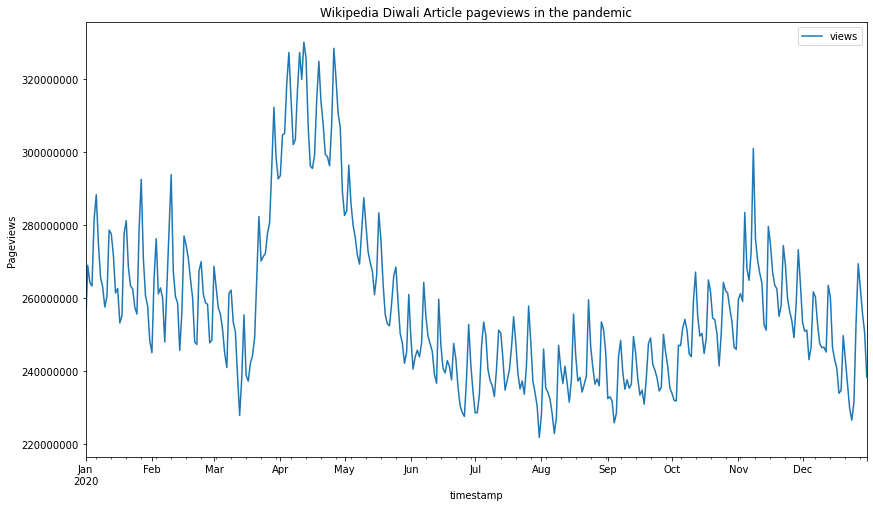

In [269]:
fig = df.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia Diwali Article pageviews in the pandemic")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

##### Question 2: All pageviews to English Wikipedia, plotted monthly, for 2017-2020

*Question 2a: For mobile-web devices only*

In [270]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
mobile_web_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "daily",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020123100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/nvgopal',
    'From': 'nvgopal@ucsd.com'
}

In [271]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [272]:
mobile_web_params_pageviews = api_call(endpoint_pageviews, mobile_web_params_pageviews)

In [273]:
mobile_web_params_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010100',
  'views': 142433697},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010200',
  'views': 147270810},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010300',
  'views': 129596119},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010400',
  'views': 122673968},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2017010500',
  'views': 120367854}]

In [274]:
df = pd.DataFrame(mobile_web_params_pageviews['items'])

In [275]:
df = df[['timestamp','views']]

In [276]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()
df = df.set_index('timestamp')

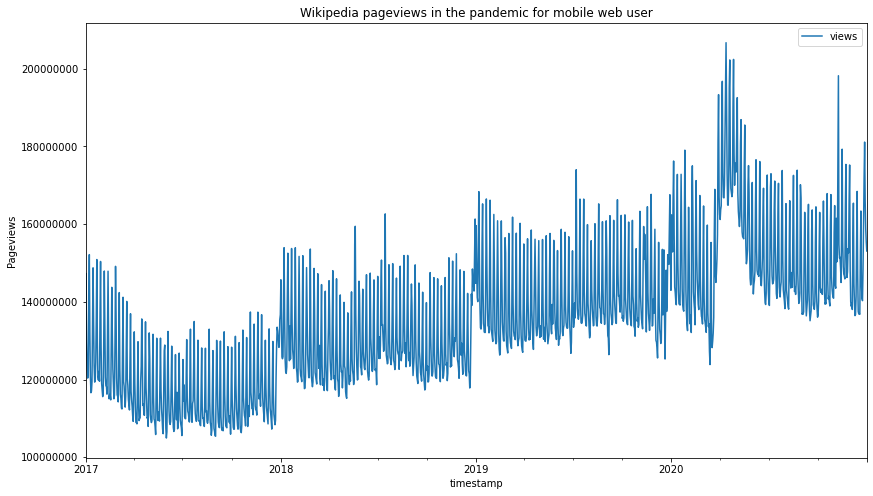

In [277]:
fig = df.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia pageviews in the pandemic for mobile web user")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

*Question 2b: For desktop devices only*

In [278]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
desktop_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "daily",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020123100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/nvgopal',
    'From': 'nvgopal@ucsd.com'
}

In [279]:
desktop_params_pageviews = api_call(endpoint_pageviews, example_params_pageviews)

In [280]:
desktop_params_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010100',
  'views': 251269426},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010200',
  'views': 268920258},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010300',
  'views': 264139157},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010400',
  'views': 263223806},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2020010500',
  'views': 281644795}]

In [281]:
df = pd.DataFrame(mobile_web_params_pageviews['items'])

In [282]:
df = df[['timestamp','views']]

In [283]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()
df = df.set_index('timestamp')

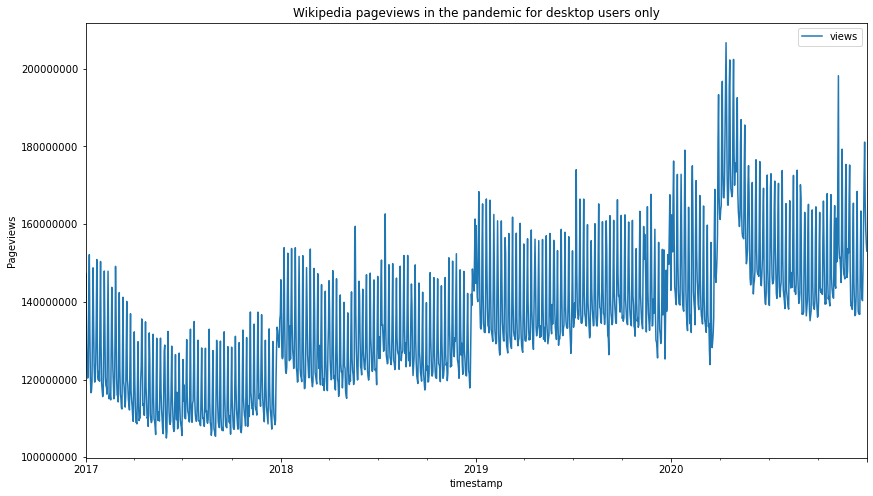

In [284]:
fig = df.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia pageviews in the pandemic for desktop users only")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

*Question 2c: For web spiders only*

In [285]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
web_spiders_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "spider",
                    "granularity" : "daily",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020123100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/nvgopal',
    'From': 'nvgopal@ucsd.com'
}

In [286]:
web_spiders_params_pageviews = api_call(endpoint_pageviews, web_spiders_params_pageviews)

In [287]:
web_spiders_params_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'daily',
  'timestamp': '2017010100',
  'views': 56700159},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'daily',
  'timestamp': '2017010200',
  'views': 52729960},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'daily',
  'timestamp': '2017010300',
  'views': 41431248},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'daily',
  'timestamp': '2017010400',
  'views': 40723785},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'daily',
  'timestamp': '2017010500',
  'views': 44238922}]

In [288]:
df = pd.DataFrame(web_spiders_params_pageviews['items'])

In [289]:
df = df[['timestamp','views']]

In [290]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()
df = df.set_index('timestamp')

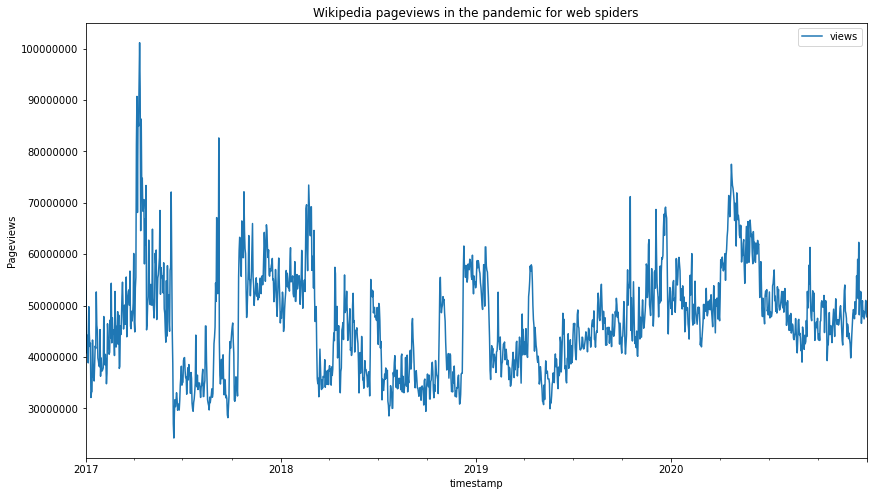

In [291]:
fig = df.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia pageviews in the pandemic for web spiders")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

##### Question 3: The top 10 most viewed articles on the same day of your choice, in at least five different language versions of Wikipedia (only needs to be a simple table or list, not a visualization)

In [292]:
viewed_pages_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "year" : "2018", #YYYYMMDDHH
                    "month" :  "06",
                    "day":"05"
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/nvgopal',
    'From': 'nvgopal@ucsd.com'
}

In [293]:
endpoint_top_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/top/{project}/{access}/{year}/{month}/{day}'
endpoint_top_pageviews

'https://wikimedia.org/api/rest_v1/metrics/pageviews/top/{project}/{access}/{year}/{month}/{day}'

In [294]:
viewed_pages_params_pageviews = api_call(endpoint_top_pageviews, viewed_pages_params_pageviews)

In [295]:
# viewed_pages_params_pageviews['items'][0:5]

In [296]:
df = pd.DataFrame(pd.DataFrame(viewed_pages_params_pageviews['items'])['articles'][0])

In [297]:
df.head(10)['article']

0              Main_Page
1             Kate_Spade
2         Special:Search
3             Andy_Spade
4            David_Spade
5       Rachel_Brosnahan
6               XHamster
7      David_A._Johnston
8           Dwight_Clark
9    2018_FIFA_World_Cup
Name: article, dtype: object